# Upper Confidence Bound (UCB)

## Importing the libraries

Here, we import NumPy, Scikit-learn, and Matplotlib to make our code shorter and more efficient!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

This dataset provides various individuals, and their click rate on 10 different ads!

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

Here, we implement the Upper Confidence Bound algorithm.

The "N" value indicates how many entries there are in the data set, and the "d" variable indicates how many different ads there are!

Then, the upper confidence bound is calculated for each ad. This is done by calculating the average reward for each ad, along with the exploration factor. If an ad has been selected less, its exploration factor is higher, making the UCB higher.

In [ ]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i] )
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
     max_upper_bound = upper_bound
     ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results



<function matplotlib.pyplot.show(close=None, block=None)>

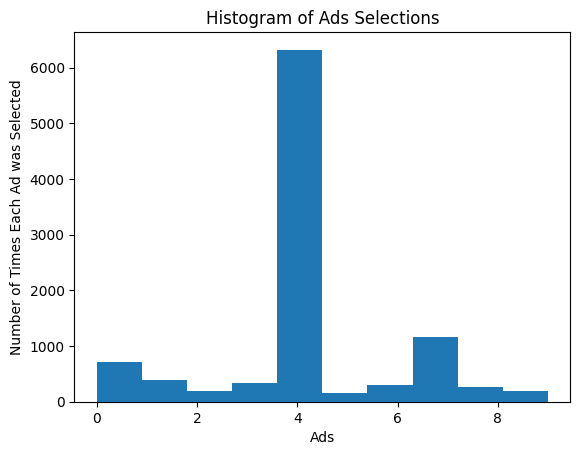

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of Times Each Ad was Selected')
plt.show